<a href="https://colab.research.google.com/github/danipequito/PqtoRep/blob/main/%5BAula03%5D_ProjetoDeAM_Parte01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O projeto de aprendizado de máquina de ponta a ponta**
## Imagine que você é o profissional responsável pela execução de um projeto de aprendizado de máquina (AM) e inteligência artificial (AI) de um importante hospital. Você foi contratado para liderar uma equipe para a criação de modelos de AM para a predição da mortalidade e internação dos pacientes que estão hospitalizados com o diagnóstico de Síndrome Respiratória Aguda Grave (SRAG), incluindo infecção por Sars-Cov-2.

- Para isso, você dispõe de uma base de dados contendo diversas características clínicas, fatores de risco e sociodemográficas.
- Como você executaria este projeto do começo ao fim?

## Vamos por partes:
- Primeiro, você precisa entender o problema que você precisa resolver;
- Segundo, entender a base e dados: executar técnicas de análise exploratória e visualização de dados, incluindo alguns testes estatísticos;
- Terceiro, estudar os principais algoritmos que podem ser utilizados para cada problema a ser resolvido: será um AM supervisionado? Será feita classificação ou regressão?
- Quarto, precisa realizar o pré-processamento dos dados de acordo com cada modelo que você deseja construir;
- Quinto, você necessita treinar o modelo;
- Sexto, ajustar o modelo;
- Sétimo, testar e validar seu modelo;
- Oitavo, apresentar seus resultados para a diretoria do hospital;
- Nono, implementar, monitorar e manter a aplicação desenvolvida.

# **Como conduzir um projeto de AM e IA?**
## 1. Importar e preparar o dataset;
## 2. Pré-processamento dos dados;
### 2.1 Verificação de dados faltantes;
### 2.2 Verificação dos tipos de dados;
### 2.3 Verificação das dimensões do dataset;  
### 2.4 Criação de novas variáveis;
### 2.5 Ajuste das variáveis categóricas;
### 2.6 Normalização das variáveis contínuas;
##  3. Análise exploratória dos dados;
## 4. Divisão do dataset em treino e teste;
## 5. Definição dos algoritmos a serem utilizados;
## 6. Otimização dos algoritmos (seleção dos melhores hiperparâmetros);
## 7. Treinamento dos algoritmos;
## 8. Validação dos modelos;
## 9. Avaliação das métricas de performance;
## 10. Plotagem de curvas para interpretação dos modelos: curvas ROC, curvas de validação e de calibração;
## 11. Aplicação de novos dados ao modelo escolhido;


# **Objetivo do projeto: prever o desfecho de SRAG, em pacientes hospitalizados.**
## **Tipo de AM**: supervisionado;
## **Tipo de tarefa de AM**: classificação binária.

# **Vamos iniciar pela análise de dados**
Para que serve?
- Serve para analisar padrões nos dados, com informações valiosas das características das variáveis e possíveis tendências.
- Pode ser realizada por meio da utilização de testes estatísticos ou técnicas de visualização.

In [ ]:
# importando os pacotes que serão utilizados
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# definindo o endereço eletrônico de onde serão coletados os dados
url = 'https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2023/INFLUD23-31-07-2023.csv'

In [ ]:
# baixando a base de dados diretamete do endereço eletrônico
response = requests.get(url)

In [ ]:
# testando se a base foi baixada
if response.status_code == 200:
    # Continue o processo
    pass
else:
    print("Falha ao baixar a base de dados.")

In [ ]:
# lendo a base de dados
with open('Dados SRAG.csv', 'wb') as file:
    file.write(response.content)

In [ ]:
# gerando o dataframe com a base de dados
dados = pd.read_csv('Dados SRAG.csv', sep=';')
dados.head()

<ipython-input-7-1a66266cb1c6>:2: DtypeWarning: Columns (15,61,62,63,91,93,120) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('Dados SRAG.csv', sep=';')


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,LOTE_2_COV,LOTE_REF,FNT_IN_COV,DOSE_2REF,FAB_COVRF2,LOTE_REF2,TRAT_COV,TIPO_TRAT,OUT_TRAT,DT_TRT_COV
0,01/01/2023,1,01/01/2023,1,AM,ENTORNO DE MANAUS E RIO NEGRO,5584.0,MANAUS,130260,FUNDACAO HEMOAM,...,210067,NaN,2,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,10/01/2023,2,06/01/2023,1,PR,10RS CASCAVEL,1364.0,CASCAVEL,410480,HOSPITAL POLICLINICA CASCAVEL,...,214VCD081Z,FH4751,2,28/03/2022,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,21OVCD309W,2.0,NaN,NaN,NaN
2,24/01/2023,4,22/01/2023,4,DF,NaN,NaN,BRASILIA,530010,HOSPITAL MATERNO INFANTIL DR ANTONIO LISBOA,...,FN5988,NaN,2,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,17/01/2023,3,15/01/2023,3,SP,GVE XV BAURU,1340.0,JAU,352530,HOSPITAL UNIMED REGIONAL JAU,...,210037,210546,2,26/05/2022,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,210546,9.0,NaN,NaN,NaN
4,01/02/2023,5,29/01/2023,5,PR,17RS LONDRINA,1371.0,ROLANDIA,412240,HOSPITAL SAO RAFAEL,...,ABX0530,FL1940,2,04/05/2022,88 - COVID-19 JANSSEN - AD26.COV2.S,207H21A,NaN,NaN,NaN,NaN


# A base de dados é representada como um dataframe, composto de linhas e colunas (como uma tabela excel);
# Na base de dados, cada linha representa um paciente (também denominados de instância ou objeto);
# Cada coluna representa os atributos de entrada (as variáveis ou as características de cada paciente);
# Nossa tarefa é de **classificação**, portanto queremos prever **classes**: nossa variável-alvo (aquela que quermos prever) será a variável que representa o desfecho (chamada de "**EVOLUCAO**"):
1. Ela possui 4 possíveis valores: 1 = cura, 2 = óbito, 3 = óbito por outras causas e 4 = ignorado. Utilizaremos somente as classes 1 e 2, portanto nossa tarefa de classificação será **binária**.

# Vamos iniciar a análise da base dados por meio da verificação de alguns tipos de dados. Podemos ter alguns tipos de dados:
1. Qualitativos: representam qualidades, são categóricos porque são associados com categorias;
2. Quantitativos: representam quantidades, são numéricos e podem ser utilizadas operações aritméticas com eles. Podem ter infintos valores e podem ser resultado de medidas.

In [ ]:
# verificando os tipos de dados
print(dados['EVOLUCAO'].dtypes)
print(dados['NU_IDADE_N'].dtypes)
print(dados['ID_UNIDADE'].dtypes)
print(dados['CS_GESTANT'].dtypes)

float64
int64
object
int64


Podemos verificar que o Python fez o reconhecimento dos tipos de dados, mas nem todos estão tipificados corretamente. Precisamos levar isto em consideração e sempre ajustar os dados corretamente.
**Como podemos obter insights sobre nosso conjunto de dados?**

A **exploração dos dados** por meio de estatística descritiva, que permite a obtenção das principais características de um conjunto de dados. Alguns exemplos de medidas que podemos obter:
- Frequências;
- Medidas de tendência central que auxiliam a entender aonde a marioria dos valores estão concentrados, como a média, moda e mediana;
- Medidas de variabilidade ou dispersão que auxiliam a entender como os valores estão dispersos ou espalhados, como desvio padrão, variância, intervalo interquartil, por exemplo;
- Distribuição dos dados.

# **Obtendo frequências**

1.0    114545
2.0     38668
9.0      1002
Name: DISPNEIA, dtype: int64
Axes(0.125,0.11;0.775x0.77)


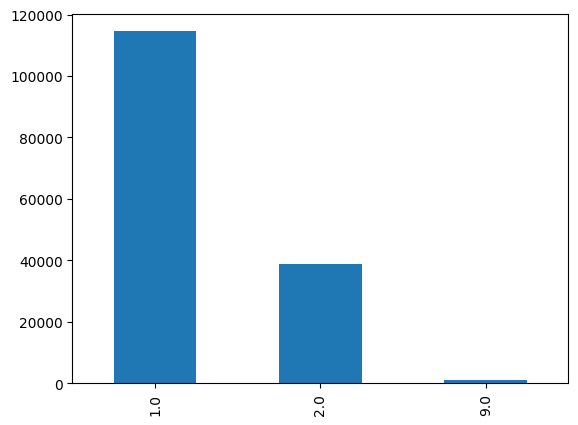

In [ ]:
# verificando frequências para uma variável
print(dados['DISPNEIA'].value_counts())
print(dados['DISPNEIA'].value_counts().plot(kind='bar'))

DISPNEIA  EVOLUCAO
1.0       1.0         78016
          2.0         10363
          9.0          3334
          3.0          3054
2.0       1.0         28504
          2.0          1920
          9.0           952
          3.0           593
9.0       1.0           553
          2.0           132
          3.0            30
          9.0            24
Name: EVOLUCAO, dtype: int64

DISPNEIA  EVOLUCAO
1.0       1.0         82.324016
          2.0         10.935241
          9.0          3.518102
          3.0          3.222641
2.0       1.0         89.161375
          2.0          6.005818
          9.0          2.977885
          3.0          1.854922
9.0       1.0         74.830853
          2.0         17.861976
          3.0          4.059540
          9.0          3.247632
Name: EVOLUCAO, dtype: float64

Axes(0.125,0.11;0.775x0.77)


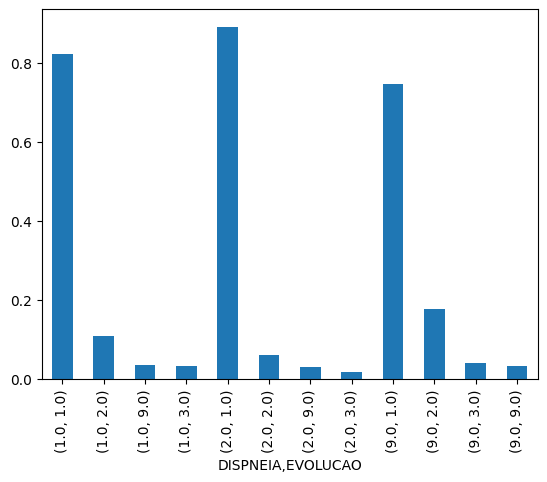

In [ ]:
# verificando as frequências para duas variáveis
print(dados.groupby('DISPNEIA')['EVOLUCAO'].value_counts())
print('')
print(dados.groupby('DISPNEIA')['EVOLUCAO'].value_counts(normalize=True)*100)
print('')
print(dados.groupby('DISPNEIA')['EVOLUCAO'].value_counts(normalize=True).plot(kind='bar'))

DESC_RESP  EVOLUCAO
1.0        1.0         74796
           2.0          9240
           9.0          3187
           3.0          2691
2.0        1.0         28430
           2.0          2469
           9.0           973
           3.0           812
9.0        1.0           491
           2.0           147
           3.0            38
           9.0            28
Name: EVOLUCAO, dtype: int64

DESC_RESP  EVOLUCAO
1.0        1.0         83.186156
           2.0         10.276486
           9.0          3.544498
           3.0          2.992860
2.0        1.0         86.984457
           2.0          7.554155
           9.0          2.976992
           3.0          2.484396
9.0        1.0         69.744318
           2.0         20.880682
           3.0          5.397727
           9.0          3.977273
Name: EVOLUCAO, dtype: float64

Axes(0.125,0.11;0.775x0.77)


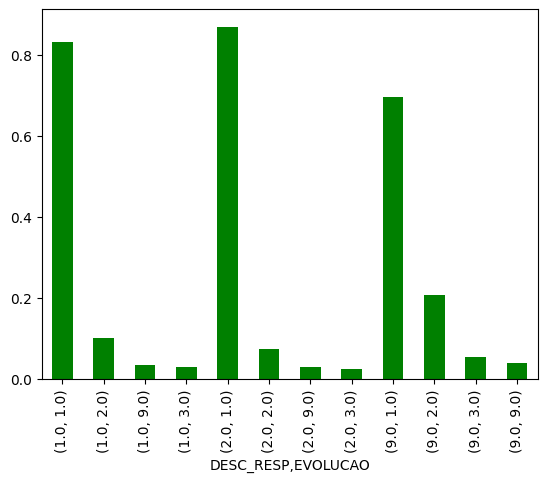

In [ ]:
# verificando as frequências para duas variáveis
print(dados.groupby('DESC_RESP')['EVOLUCAO'].value_counts())
print('')
print(dados.groupby('DESC_RESP')['EVOLUCAO'].value_counts(normalize=True)*100)
print('')
print(dados.groupby('DESC_RESP')['EVOLUCAO'].value_counts(normalize=True).plot(kind='bar', color='green'))

SUPORT_VEN  EVOLUCAO
1.0         1.0          7213
            2.0          5496
            3.0          1631
            9.0           582
2.0         1.0         62249
            2.0          4977
            9.0          2106
            3.0          1447
3.0         1.0         36751
            2.0          1554
            9.0          1360
            3.0           445
9.0         1.0          2470
            2.0           310
            9.0           210
            3.0           106
Name: EVOLUCAO, dtype: int64

SUPORT_VEN  EVOLUCAO
1.0         1.0         48.338024
            2.0         36.831524
            3.0         10.930170
            9.0          3.900281
2.0         1.0         87.948403
            2.0          7.031747
            9.0          2.975459
            3.0          2.044392
3.0         1.0         91.625530
            2.0          3.874346
            9.0          3.390676
            3.0          1.109449
9.0         1.0         79.780362
      

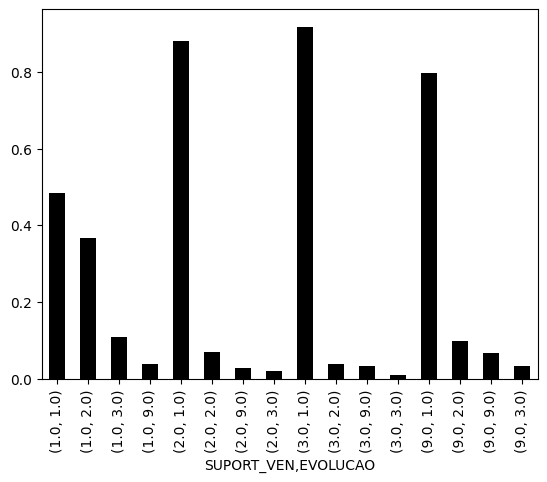

In [ ]:
# verificando as frequências para duas variáveis
print(dados.groupby('SUPORT_VEN')['EVOLUCAO'].value_counts())
print('')
print(dados.groupby('SUPORT_VEN')['EVOLUCAO'].value_counts(normalize=True)*100)
print('')
print(dados.groupby('SUPORT_VEN')['EVOLUCAO'].value_counts(normalize=True).plot(kind='bar', color='black'))

# **Verificando a distribuição dos dados**

## Podemos obter esta distribuição por meio de histogramas, que permitem visualizar e compreender a distribuição dos dados.

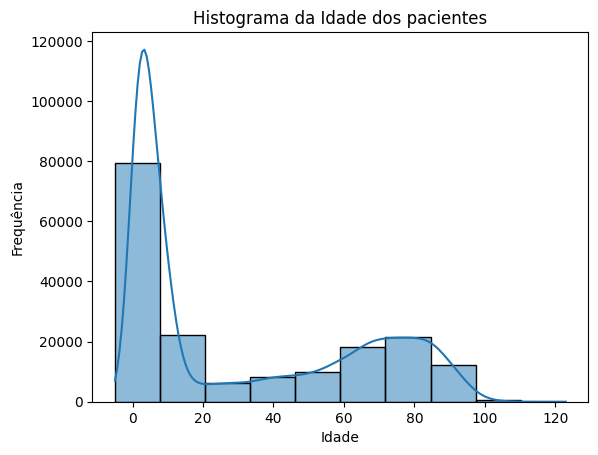

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usar a função histplot para criar um histograma
sns.histplot(dados["NU_IDADE_N"], kde=True, bins=10) # kde=True para ativar a estimativa de densidade (curva suave que mostra a distribuição dos dados)
plt.title("Histograma da Idade dos pacientes")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()


Podemos verificar que os dados não seguem uma distribuição normal (gaussiana).

Nosso conjunto de dados pode ter valores que destoam muito da média, os outliers. Vamos verificar as medidas de tendência central e de dispersão, bem como a presença de outliers.

In [ ]:
import numpy as np
# avaliando a variável Idade
# estatísticas básicas das variáveis numéricas
media = dados['NU_IDADE_N'].astype('int').mean()
print("A média é: {}".format(media))
minino = dados['NU_IDADE_N'].astype('int').min()
print("O valor mínino é: {}".format(minino))
maximo = dados['NU_IDADE_N'].astype('int').max()
print("O valor máximo é: {}".format(maximo))
dp = dados['NU_IDADE_N'].astype('int').std()
print("O desvio padrão é: {}".format(dp))

A média é: 30.945387934178267
O valor mínino é: 0
O valor máximo é: 100
O desvio padrão é: 32.68948607828768


Podemos fazer um gráfico chamado "**boxplot**". Este gráfico permite a visualização de caracterísicas descritivas dos dados, bem como detectar a presença de outliers.

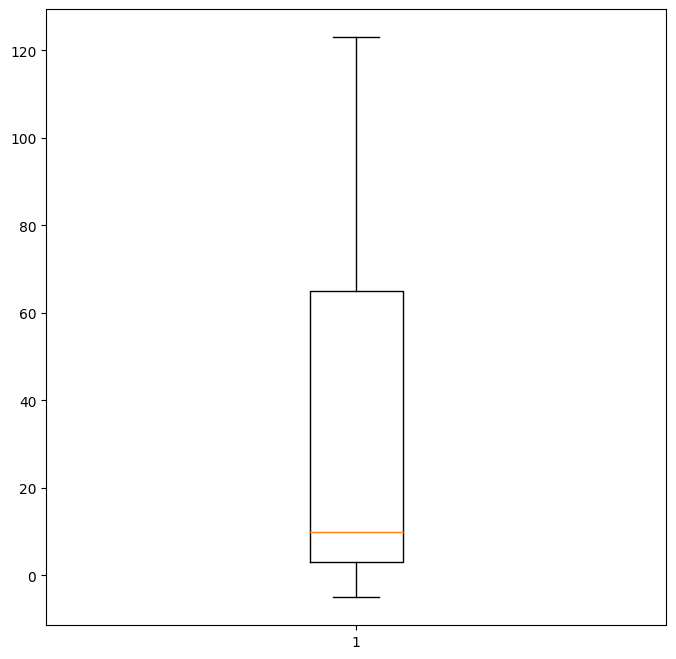

In [ ]:
# visualizando os outliers
import matplotlib.pyplot as plt
plt.figure(figsize =(8, 8))
plt.boxplot(dados['NU_IDADE_N'])
plt.show()

## **Vamos entender o boxplot?**
- A linha laranja representa a mediana (Q2), ou seja, o valor do meio quando os dados estão ordenados;
- A caixa representa o intervalo interquartil, ou seja, a diferença entre o terceiro e o primeiro quartil;
- A forma da caixa pode indicar se a distribuição é gaussiana (normal).

Podemos notar que existem pacientes com idade entre -5 anos até 123 anos. Vamos filtrar a base de dados para considerar pacientes entre 0 a 100 anos.

In [ ]:
dados = dados.query('NU_IDADE_N >= 0 & NU_IDADE_N <= 100')

In [ ]:
import numpy as np
# avaliando a variável Idade
# estatísticas básicas das variáveis numéricas
media = dados['NU_IDADE_N'].astype('int').mean()
print("A média é: {}".format(media))
minino = dados['NU_IDADE_N'].astype('int').min()
print("O valor mínino é: {}".format(minino))
maximo = dados['NU_IDADE_N'].astype('int').max()
print("O valor máximo é: {}".format(maximo))
dp = dados['NU_IDADE_N'].astype('int').std()
print("O desvio padrão é: {}".format(dp))

A média é: 30.945387934178267
O valor mínino é: 0
O valor máximo é: 100
O desvio padrão é: 32.68948607828768


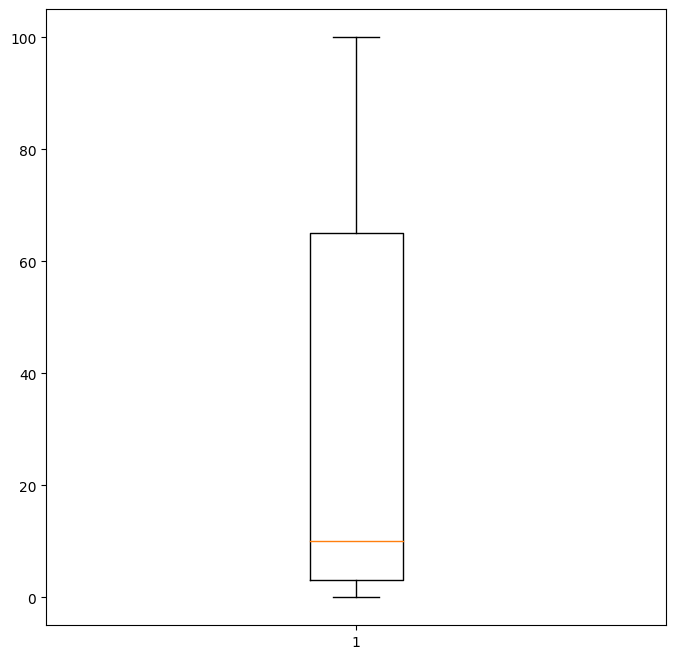

In [ ]:
# visualizando os outliers
import matplotlib.pyplot as plt
plt.figure(figsize =(8, 8))
plt.boxplot(dados['NU_IDADE_N'])
plt.show()

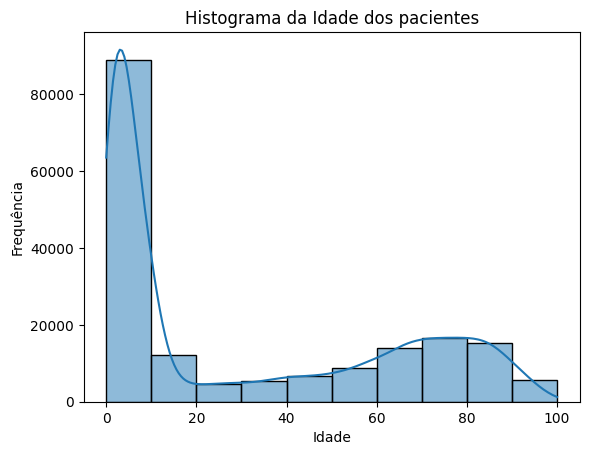

In [ ]:
# Usar a função histplot para criar um histograma
sns.histplot(dados["NU_IDADE_N"], kde=True, bins=10) # kde=True para ativar a estimativa de densidade (curva suave que mostra a distribuição dos dados)
plt.title("Histograma da Idade dos pacientes")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

In [ ]:
# calculando os quartis
pquartil = np.quantile(dados['NU_IDADE_N'].astype('int'), 0.25)
print("25% das pessoas tem idade menor que: {}".format(pquartil))
squartil = np.quantile(dados['NU_IDADE_N'].astype('int'), 0.5)
print("50% das pessoas tem idade menor que: {}".format(squartil))
tquartil = np.quantile(dados['NU_IDADE_N'].astype('int'), 0.75)
print("75% das pessoas tem idade menor que: {}".format(tquartil))

25% das pessoas tem idade menor que: 3.0
50% das pessoas tem idade menor que: 10.0
75% das pessoas tem idade menor que: 65.0


In [ ]:
# Calcular os quartis
q1 = np.percentile(dados['NU_IDADE_N'], 25)
q2 = np.percentile(dados['NU_IDADE_N'], 50)  # Mediana
q3 = np.percentile(dados['NU_IDADE_N'], 75)

print("Primeiro Quartil (Q1):", q1)
print("Mediana (Q2):", q2)
print("Terceiro Quartil (Q3):", q3)

Primeiro Quartil (Q1): 3.0
Mediana (Q2): 10.0
Terceiro Quartil (Q3): 65.0


Podemos obter uma descrição estatística da variável Idade.

In [ ]:
dados['NU_IDADE_N'].describe()

count    178239.000000
mean         30.945388
std          32.689486
min           0.000000
25%           3.000000
50%          10.000000
75%          65.000000
max         100.000000
Name: NU_IDADE_N, dtype: float64

In [ ]:
import numpy as np

def detect_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

outliers = detect_outliers(dados['NU_IDADE_N'])
print("Outliers:", outliers)


Outliers: []


## Podemos realizar alguns cálculo estatísticos para visualização.

In [ ]:
# cálculo da média
print(round(np.mean(dados['NU_IDADE_N'])))

31


In [ ]:
# cálculo da mediana
print(np.median(dados['NU_IDADE_N']))

10.0


In [ ]:
import statistics as sts
# cálculo da variância
print(round(sts.variance(dados['NU_IDADE_N'])))
print(round(np.var(dados['NU_IDADE_N'])))
print('A variãncia indica o quão espalhados os dados estão da média')

1069
1069
A variãncia indica o quão espalhados os dados estão da média


In [ ]:
# cálculo do desvio padrão
print(round(np.std(dados['NU_IDADE_N'])))
print('O desvio padrão representa a raiz quadrada da variância')

33
O desvio padrão representa a raiz quadrada da variância


## **Podemos avaliar a Idade com relação ao desfecho da infecção**

In [ ]:
# considerando somente pacientes que foram a óbito
obitos = dados[dados['EVOLUCAO'] == 2]

In [ ]:
# considerando somente pacientes que foram curados
curados = dados[dados['EVOLUCAO'] == 1]

In [ ]:
# verificando as dimensões
obitos_ = obitos.shape[0]
curados_ = curados.shape[0]

print('O número de pacientes que foram a óbito é {}'.format(obitos_))
print('O número de pacientes que foram a óbito é {}'.format(curados_))

O número de pacientes que foram a óbito é 13742
O número de pacientes que foram a óbito é 123923


In [ ]:
obitos['NU_IDADE_N'].describe()

count    13742.000000
mean        65.698297
std         24.073555
min          0.000000
25%         57.000000
50%         72.000000
75%         83.000000
max        100.000000
Name: NU_IDADE_N, dtype: float64

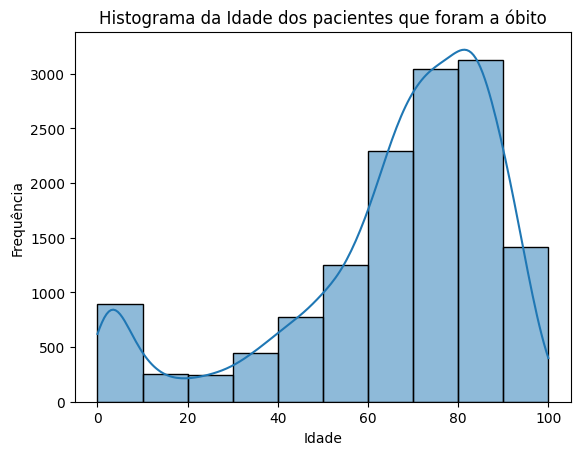

In [ ]:
# Usar a função histplot para criar um histograma
sns.histplot(obitos["NU_IDADE_N"], kde=True, bins=10) # kde=True para ativar a estimativa de densidade (curva suave que mostra a distribuição dos dados)
plt.title("Histograma da Idade dos pacientes que foram a óbito")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

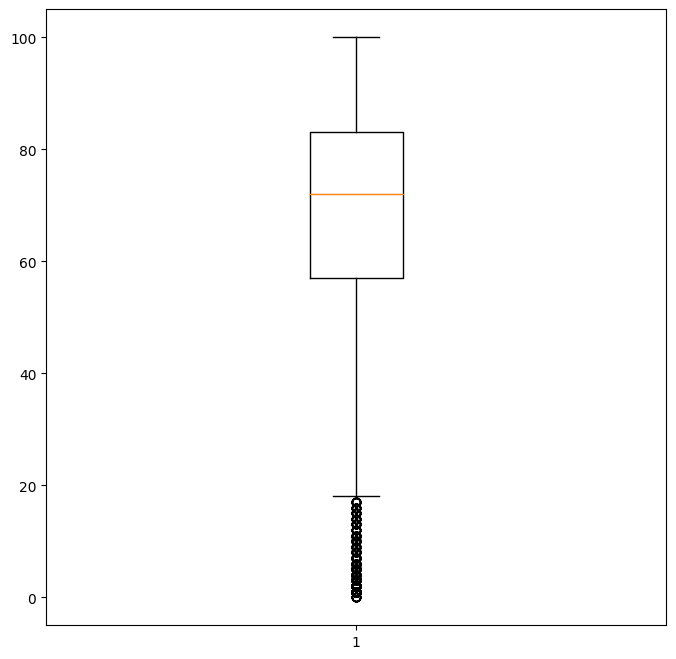

In [ ]:
# visualizando os outliers
import matplotlib.pyplot as plt
plt.figure(figsize =(8, 8))
plt.boxplot(obitos['NU_IDADE_N'])
plt.show()

In [ ]:
curados['NU_IDADE_N'].describe()

count    123923.000000
mean         26.376847
std          31.004104
min           0.000000
25%           3.000000
50%           8.000000
75%          56.000000
max         100.000000
Name: NU_IDADE_N, dtype: float64

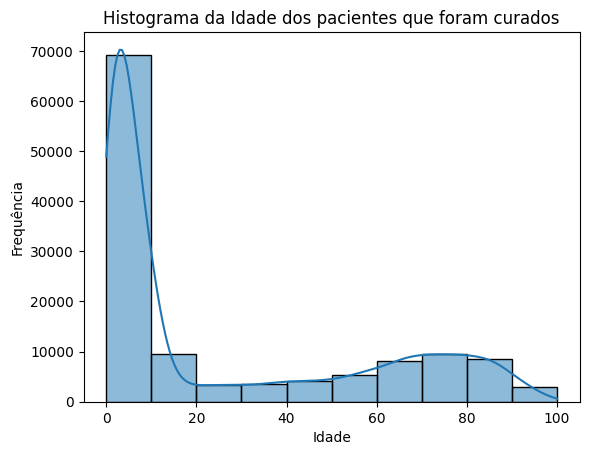

In [ ]:
# Usar a função histplot para criar um histograma
sns.histplot(curados["NU_IDADE_N"], kde=True, bins=10) # kde=True para ativar a estimativa de densidade (curva suave que mostra a distribuição dos dados)
plt.title("Histograma da Idade dos pacientes que foram curados")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

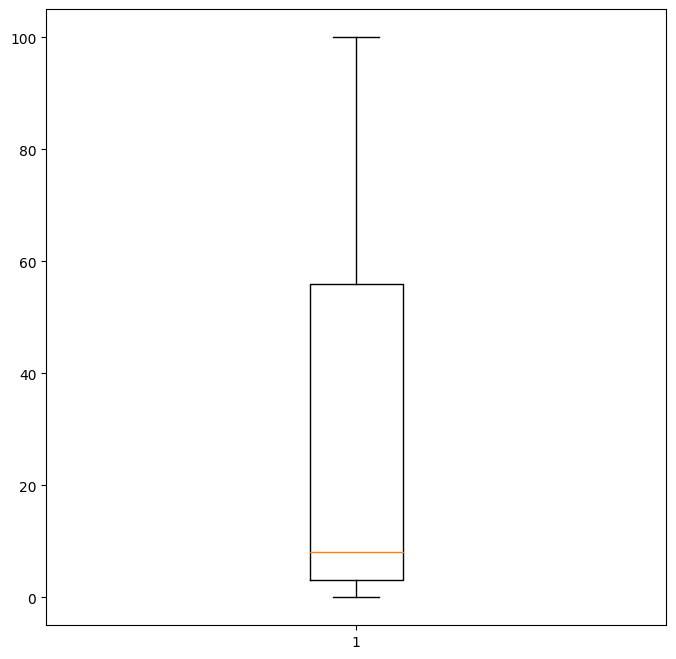

In [ ]:
# visualizando os outliers
import matplotlib.pyplot as plt
plt.figure(figsize =(8, 8))
plt.boxplot(curados['NU_IDADE_N'])
plt.show()

## **Podemos também verificar outras características**

<Axes: xlabel='SUPORT_VEN,CS_GESTANT'>

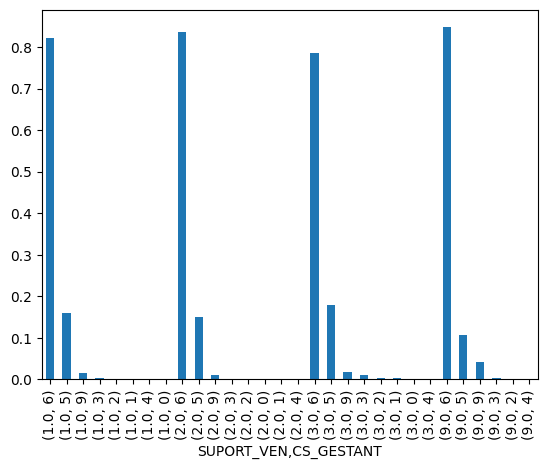

In [ ]:
curados.groupby('SUPORT_VEN')['CS_GESTANT'].value_counts(normalize=True).plot(kind='bar')

## Podemos criar um heatmap (mapa de calor) que permitem a identificação de relações entre as variáveis.

Para isso, vamos selecionar algumas variáveis

In [ ]:
# alterando os nomes das categorias
map = {1: 'Suporte Invasivo', 2: 'Suporte não invasivo', 3: 'Não usou suporte ventilatório', 9: 'Ignorado'}
dados['SUPORT_VEN'] = dados['SUPORT_VEN'].replace(map)

In [ ]:
# alterando os nomes das categorias
map2 = {1 : 'Cura', 2: 'Óbito', 3: 'Óbito por outras causas', 9: 'Ignorado'}
dados['EVOLUCAO'] = dados['EVOLUCAO'].replace(map2)

In [ ]:
# Calcular a contagem das combinações de categorias
cross_tab = pd.crosstab(dados['EVOLUCAO'], dados['SUPORT_VEN'])
cross_tab

SUPORT_VEN,Ignorado,Não usou suporte ventilatório,Suporte Invasivo,Suporte não invasivo
EVOLUCAO,,,,
Cura,2468,36731,7210,62216
Ignorado,209,1357,582,2101
Óbito,309,1540,5488,4941
Óbito por outras causas,106,444,1631,1444


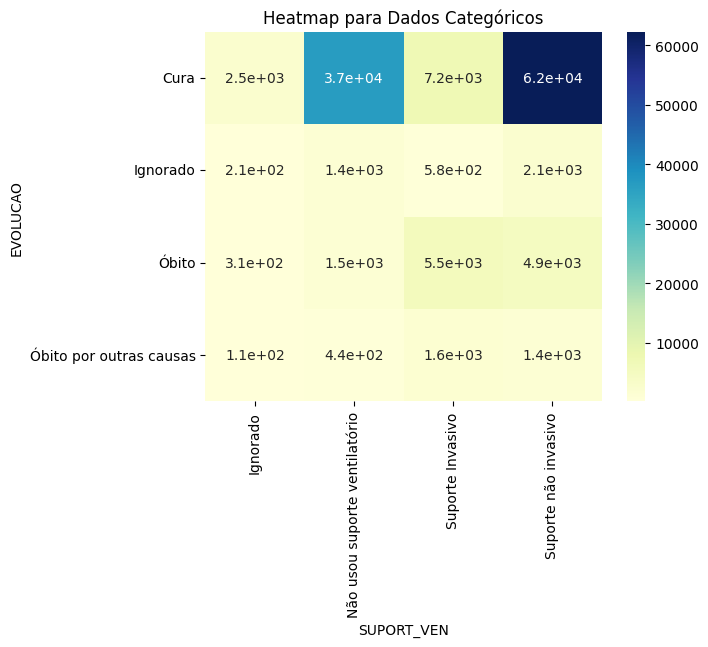

In [ ]:
# Criar um heatmap com Seaborn
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')

plt.title("Heatmap para Dados Categóricos")
plt.show()

Este heatmap para dados categóricos representa a combinação de contagens para as variáveis consideradas.
Podemos visualizar graficamente.

Axes(0.125,0.11;0.775x0.77)


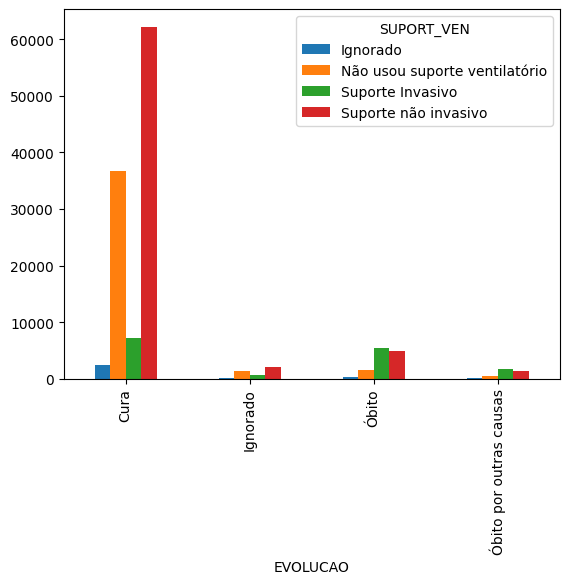

In [ ]:
print(cross_tab.plot(kind='bar'))

Podemos aplicar um teste estatístico para avaliar a associação entre estas duas variáveis. Como são variáveis categóricas, utilizaremos o qui-quadrado.
O Python possui uma bibliteca de estatística que possui uma função pronta para  cálculo do qui-quadrado.

In [ ]:
# importando a biblioteca
from scipy.stats import chi2_contingency

In [ ]:
# Criar uma tabela de contingência de exemplo
cross_tab = pd.crosstab(dados['EVOLUCAO'], dados['SUPORT_VEN'])

# Realizar o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(cross_tab)

print("Estatística qui-quadrado:", chi2)
print("Valor-p: {:.{}f}".format(p, 105))
print("Graus de liberdade:", dof)
print("Frequências esperadas:")
print(expected)

Estatística qui-quadrado: 20353.906363810125
Valor-p: 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Graus de liberdade: 9
Frequências esperadas:
[[ 2608.1404288  33801.23003331 12577.61382079 59638.01571709]
 [  102.02060927  1322.17653774   491.98877905  2332.81407394]
 [  294.80090389  3820.58920459  1421.66115067  6740.94874085]
 [   87.03805804  1128.00422436   419.73624949  1990.22146812]]


Vamos fazer o mesmo para outras variáveis.


In [ ]:
# alterando os nomes das categorias
map3 = {1: 'Febre', 2: 'Sem febre', 9: 'Ignorado'}
dados['FEBRE'] = dados['FEBRE'].replace(map3)

In [ ]:
# Criar uma tabela de contingência de exemplo
cross_tab2 = pd.crosstab(dados['FEBRE'], dados['EVOLUCAO'])

# Realizar o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(cross_tab2)

print("Estatística qui-quadrado:", chi2)
print("Valor-p: {:.{}f}".format(p, 105))
print("Graus de liberdade:", dof)
print("Frequências esperadas:")
print(expected)

Estatística qui-quadrado: 2869.6704036568863
Valor-p: 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Graus de liberdade: 6
Frequências esperadas:
[[7.11406827e+04 2.73948148e+03 7.38649778e+03 2.20333808e+03]
 [7.82402620e+02 3.01287169e+01 8.12364318e+01 2.42322314e+01]
 [3.58209147e+04 1.37938981e+03 3.71926579e+03 1.10942969e+03]]


Axes(0.125,0.11;0.775x0.77)


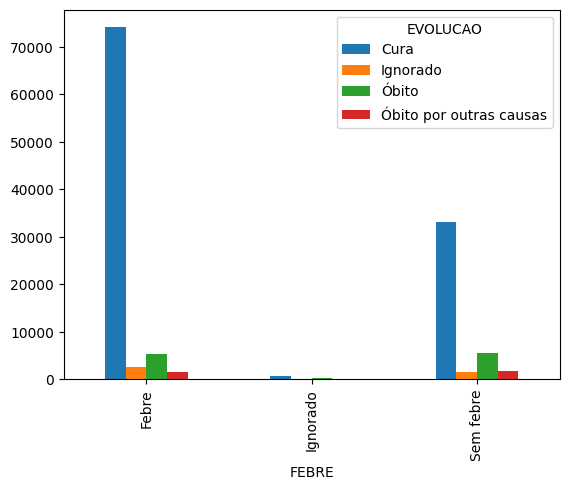

In [ ]:
print(cross_tab2.plot(kind='bar'))

In [ ]:
# alterando os nomes das categorias
map4 = {1: 'Tosse', 2: 'Sem tosse', 9: 'Ignorado'}
dados['TOSSE'] = dados['TOSSE'].replace(map4)

In [ ]:
# Criar uma tabela de contingência de exemplo
cross_tab3 = pd.crosstab(dados['TOSSE'], dados['EVOLUCAO'])

# Realizar o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(cross_tab3)

print("Estatística qui-quadrado:", chi2)
print("Valor-p: {:.{}f}".format(p, 105))
print("Graus de liberdade:", dof)
print("Frequências esperadas:")
print(expected)

Estatística qui-quadrado: 6880.64595844726
Valor-p: 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Graus de liberdade: 6
Frequências esperadas:
[[5.41201186e+02 2.04250110e+01 5.50574892e+01 1.63163139e+01]
 [1.89890653e+04 7.16650071e+02 1.93179595e+03 5.72488677e+02]
 [9.46717335e+04 3.57292492e+03 9.63114656e+03 2.85419501e+03]]


Axes(0.125,0.11;0.775x0.77)


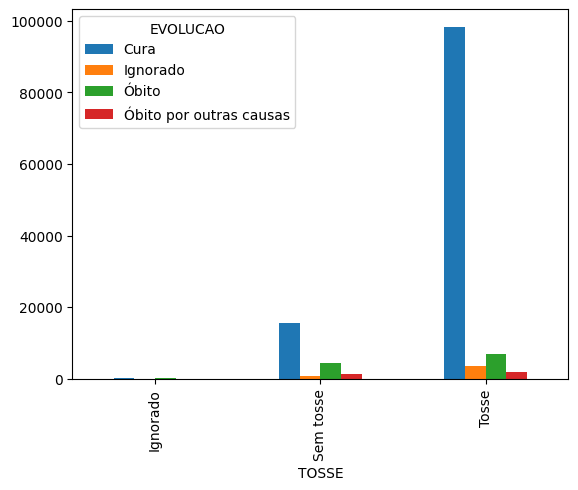

In [ ]:
print(cross_tab3.plot(kind='bar'))

In [ ]:
# alterando os nomes das categorias
map5 = {1: 'Sim', 2: 'Não', 9: 'Ignorado'}
dados['VACINA'] = dados['VACINA'].replace(map5)

In [ ]:
# Criar uma tabela de contingência de exemplo
cross_tab4 = pd.crosstab(dados['VACINA'], dados['EVOLUCAO'])

# Realizar o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(cross_tab4)

print("Estatística qui-quadrado:", chi2)
print("Valor-p: {:.{}f}".format(p, 105))
print("Graus de liberdade:", dof)
print("Frequências esperadas:")
print(expected)

Estatística qui-quadrado: 265.92121010642956
Valor-p: 0.000000000000000000000000000000000000000000000000000001617675172736942626057197860127662129211313239724413
Graus de liberdade: 6
Frequências esperadas:
[[33494.60587681  1319.45621703  4448.4375876   1392.50031856]
 [23837.15242488   939.01922832  3165.82572186   991.00262494]
 [ 7324.24169831   288.52455465   972.73669054   304.4970565 ]]


Axes(0.125,0.11;0.775x0.77)


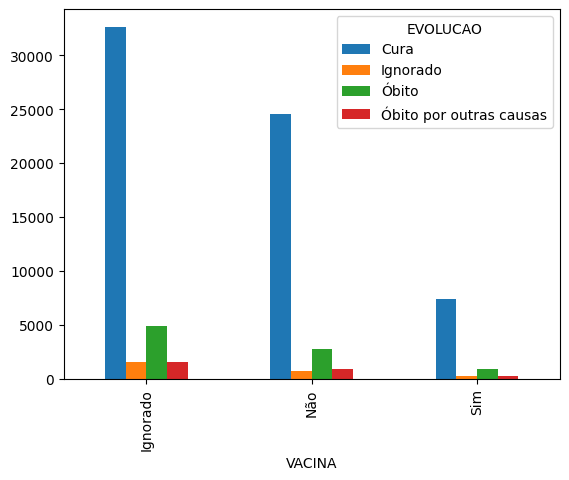

In [ ]:
print(cross_tab4.plot(kind='bar'))

In [ ]:
cross_tab

SUPORT_VEN,Ignorado,Não usou suporte ventilatório,Suporte Invasivo,Suporte não invasivo
EVOLUCAO,,,,
Cura,2468,36731,7210,62216
Ignorado,209,1357,582,2101
Óbito,309,1540,5488,4941
Óbito por outras causas,106,444,1631,1444


In [ ]:
# Calcular a razão de chances
# Criar uma tabela de contingência de exemplo
table2 = np.array([[5488	, 7210],
                  [1540, 36731]])

odds_ratio2 = (table2[0, 0] * table2[1, 1]) / (table2[0, 1] * table2[1, 0])

print("Razão de Chances:", odds_ratio2)
print('A chance de óbito em pacientes que usaram IOT é {} vezes maior do que pacientes que não usaram'.format(odds_ratio2))

Razão de Chances: 18.15477493380406
A chance de óbito em pacientes que usaram IOT é 18.15477493380406 vezes maior do que pacientes que não usaram
